In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-17 11:48:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K   126KB/s    in 0,6s    

2020-05-17 11:48:26 (126 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


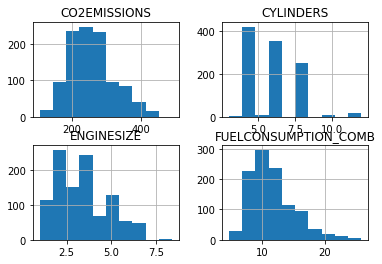

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

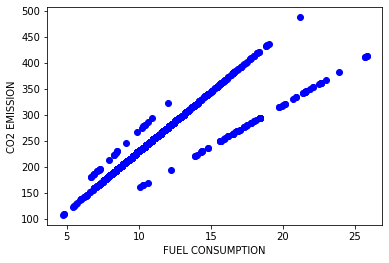

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("CO2 EMISSION")
plt.show()

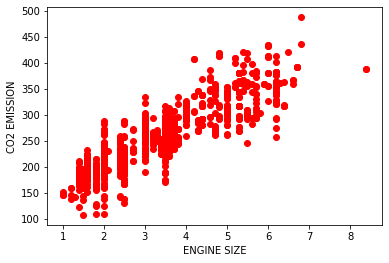

In [8]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="red")
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION")
plt.show()

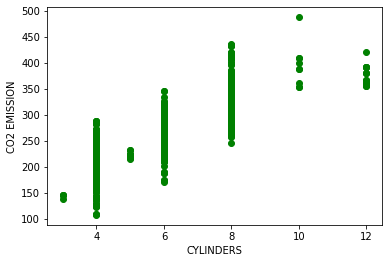

In [9]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color="green")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 EMISSION")
plt.show()

In [10]:
# Toplam verinin %80'inin train olarak almak için oluşturduğumuz array. Bu bir maskeleme sağlar.
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk] # Eğitim verisi
test = cdf[~msk] # Test verisi

## Simple Linear Regression

Verilen tek bir bağımsız değişkene karşılık bağımlı bir değişkeni tahmin etmeye çalışacağımız bir model bulmaya çalışacağız. Buradaki örnek için ENGINESIZE ile CO2EMISSION arasındaki ilişkiyi inceleyeceğiz.


***Train verisini üzerindeki dağılımı gösteren grafik***

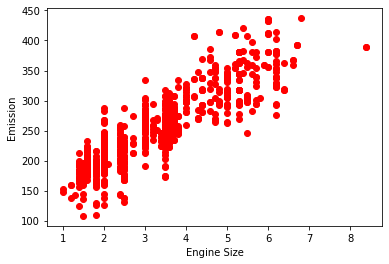

In [11]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

***Modeli eğitelim***

In [12]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.16747012]]
Intercept:  [125.10106251]


Modelimizin çıktısı olan grafiği eğitim verisi ile birlikte grafik üzerinde gösterelim.

Text(0, 0.5, 'Emission')

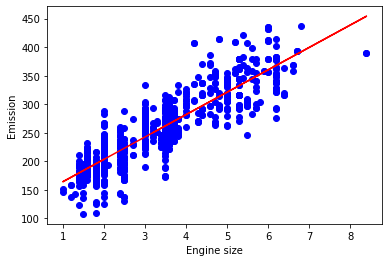

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

***Değerlendirme***

Şimdi ise üretmiş olduğumuz modelin ne kadar iyi olduğunu değerlendireceğiz. Bunun için aşağıdaki göstergeleri kullanabiliriz. 

* ***Mean Absolute Error (MAE):*** Gerçek değer ile tahminler arasındaki farkın mutlak değerinin ortalamasıdır.
* ***Mean Squared Error (MSE):*** Gerçek değer ile tahminler arasındaki farkın karesinin ortalamasıdır. Bu MEA'dan daha popülerdir.Bunun değeri çıkan değerde büyük hataların, karelerin alınması dolayaısı ile  daha yüksek oranda etki yapmasıdır. 
* ***Root Mean Squared Error (RMSE):*** MSE değerinin kare köküdür.
* ***R-square:*** Gerçek değere ne kadar yakın olduğunu ölçmek için kullanılır. Değer ne kadar büyükse tahmin o kadar iyidir. En büyük değer 1.0 olabilir. 

In [19]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat=regr.predict(test_x)

print("MAE: %.2f" % np.mean(np.absolute(test_y_hat-test_y)))
print("MSE: %.2f" % np.mean((test_y_hat-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_hat,test_y))

MAE: 23.50
MSE: 1012.46
R2-score: 0.68


Yukarıdaki R2 score değeri kötü değil ama daha iyi olabilir bunun için farklı featurelar denenebilir yada daha fazla feature alınarak Multiple Regression Yapılabilir.